### PART 3: Model Visualization

As I have introduced RF and GBDT models in Part 2, we have seen that feature importances is a way to visualize these two models. However, by introducing them by plenty of arrays, it is difficult to see what is going on. In this section, I will visualize RF and GBDT by using stacked bar charts and line graphs.  

Three main points from the models:  
- Uncertainty plays more important role as we increase the window length of forecast.  
- Trend plays less important role as we increase the window length of forecast.  
- Momentum importances wildly fluctuate along window length of forecast while volume (introduced as supplementary indicator) plays the least important role among the four.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

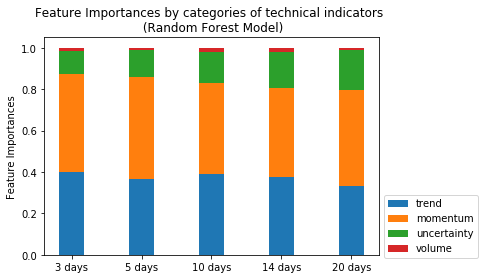

In [27]:
WIDTH = 0.35
IDX = np.arange(5)

fig, ax = plt.subplots()
RF_Trend_Features = np.array([0.39972767000000003, 0.36730514, 0.38840329, 0.37707706, 0.33159299000000003])
RF_Mom_Features = np.array([0.47406901, 0.49048927000000003, 0.44188629, 0.42831919, 0.46456317])
RF_Unc_Features = np.array([0.1101321, 0.13060396, 0.15127436, 0.17552063, 0.19224921])
RF_Vol_Features = np.array([0.01607122, 0.01160163, 0.01843605, 0.01908312, 0.01159462])

p1 = ax.bar(IDX, RF_Trend_Features, WIDTH)
p2 = ax.bar(IDX, RF_Mom_Features, WIDTH, bottom = RF_Trend_Features)
p3 = ax.bar(IDX, RF_Unc_Features, WIDTH, bottom = RF_Trend_Features + RF_Mom_Features)
p4 = ax.bar(IDX,RF_Vol_Features, WIDTH, bottom = RF_Trend_Features + RF_Mom_Features + RF_Unc_Features)

plt.ylabel('Feature Importances')
plt.title('Feature Importances by categories of technical indicators \n (Random Forest Model)')
plt.xticks(IDX, ('3 days', '5 days', '10 days', '14 days', '20 days'))

plt.legend((p1[0], p2[0], p3[0], p4[0]), ('trend', 'momentum', 'uncertainty', 'volume'), bbox_to_anchor=(1, 0.3))


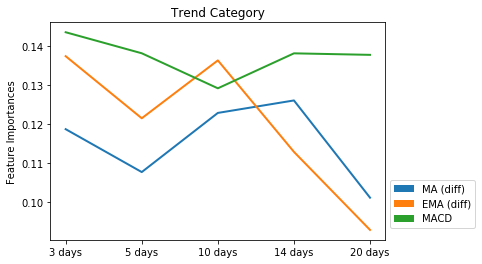

In [28]:
fig, ax = plt.subplots()

Delta_MA = [0.11867165, 0.10763555, 0.12285178, 0.12606207, 0.10104805]
Delta_EMA = [0.13744927, 0.12147414, 0.13636612, 0.11283539, 0.0927546]
MACD = [0.14360675, 0.13819545, 0.12918539, 0.1381796, 0.13779034]

l1 = ax.plot(IDX, Delta_MA, linewidth = 2)
l2 = ax.plot(IDX, Delta_EMA, linewidth = 2)
l3 = ax.plot(IDX, MACD, linewidth = 2)

plt.ylabel('Feature Importances')
plt.title('Trend Category')
plt.xticks(IDX, ('3 days', '5 days', '10 days', '14 days', '20 days'))

plt.legend((p1[0], p2[0], p3[0]), ('MA (diff)', 'EMA (diff)', 'MACD'), bbox_to_anchor=(1, 0.3))

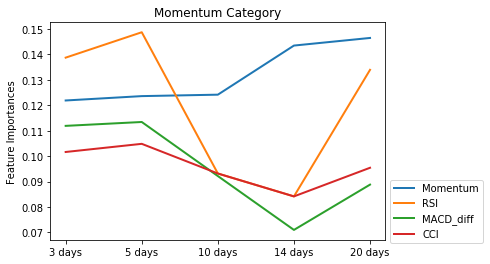

In [31]:
fig, ax = plt.subplots()

MOM = [0.12186161, 0.12357743, 0.12414469, 0.14343982, 0.14643275]
RSI = [0.13869216, 0.1486735, 0.09316876, 0.08417255, 0.1339007]
MACD_D = [0.11188888, 0.11341031, 0.09216624, 0.07100453, 0.08880395]
CCI = [0.10162636, 0.10482803, 0.09316876, 0.08417255, 0.09542577]

l1 = ax.plot(IDX, MOM, linewidth = 2)
l2 = ax.plot(IDX, RSI, linewidth = 2)
l3 = ax.plot(IDX, MACD_D, linewidth = 2)
l4 = ax.plot(IDX, CCI, linewidth = 2)

plt.ylabel('Feature Importances')
plt.title('Momentum Category')
plt.xticks(IDX, ('3 days', '5 days', '10 days', '14 days', '20 days'))

plt.legend((l1[0], l2[0], l3[0], l4[0]), ('Momentum', 'RSI', 'MACD_diff', 'CCI'), bbox_to_anchor=(1, 0.3))

In [33]:
GBDT_3 = np.array([0.10435695, 0.11534909, 0.16439193, 0.14161082, 0.15073945,
       0.08508032, 0.09469754, 0.12505739, 0.01871651])
GBDT_5 = np.array([0.1090932 , 0.12614487, 0.15802491, 0.15340729, 0.1269216 ,
       0.07227506, 0.09980479, 0.14222659, 0.01210169])
GBDT_10 = np.array([0.08089871, 0.10088227, 0.14429805, 0.11331059, 0.15046714,
       0.09380513, 0.09237344, 0.18655525, 0.0374094 ])
GBDT_14 = np.array([0.07471256, 0.07096399, 0.14524494, 0.18286065, 0.10304173,
       0.05823706, 0.08481881, 0.2546925 , 0.02542777])
GBDT_20 = np.array([0.07911951, 0.08905021, 0.12365312, 0.12967339, 0.13499752,
       0.10396411, 0.08518436, 0.24679956, 0.00755822])

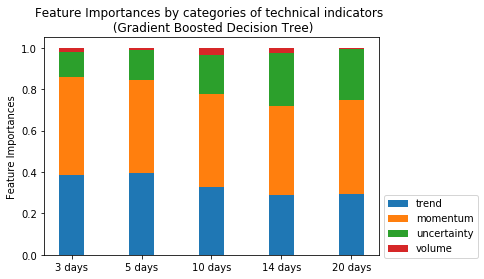

In [35]:
WIDTH = 0.35
IDX = np.arange(5)

fig, ax = plt.subplots()
RF_Trend_Features = np.array([GBDT_3[0]+GBDT_3[1]+GBDT_3[2], GBDT_5[0]+GBDT_5[1]+GBDT_5[2], GBDT_10[0]+GBDT_10[1]+GBDT_10[2],
                             GBDT_14[0]+GBDT_14[1]+GBDT_14[2], GBDT_20[0]+GBDT_20[1]+GBDT_20[2]])
RF_Mom_Features = np.array([GBDT_3[3]+GBDT_3[4]+GBDT_3[5] + GBDT_3[6], GBDT_5[3]+GBDT_5[4]+GBDT_5[5] + GBDT_5[6], 
                           GBDT_10[3]+GBDT_10[4]+GBDT_10[5] + GBDT_10[6], GBDT_14[3]+GBDT_14[4]+GBDT_14[5] + GBDT_14[6], 
                           GBDT_20[3]+GBDT_20[4]+GBDT_20[5] + GBDT_20[6]])
RF_Unc_Features = np.array([GBDT_3[7], GBDT_5[7], GBDT_10[7], GBDT_14[7], GBDT_20[7]])
RF_Vol_Features = np.array([GBDT_3[8], GBDT_5[8], GBDT_10[8], GBDT_14[8], GBDT_20[8]])

p1 = ax.bar(IDX, RF_Trend_Features, WIDTH)
p2 = ax.bar(IDX, RF_Mom_Features, WIDTH, bottom = RF_Trend_Features)
p3 = ax.bar(IDX, RF_Unc_Features, WIDTH, bottom = RF_Trend_Features + RF_Mom_Features)
p4 = ax.bar(IDX,RF_Vol_Features, WIDTH, bottom = RF_Trend_Features + RF_Mom_Features + RF_Unc_Features)

plt.ylabel('Feature Importances')
plt.title('Feature Importances by categories of technical indicators \n (Gradient Boosted Decision Tree)')
plt.xticks(IDX, ('3 days', '5 days', '10 days', '14 days', '20 days'))

plt.legend((p1[0], p2[0], p3[0], p4[0]), ('trend', 'momentum', 'uncertainty', 'volume'), bbox_to_anchor=(1, 0.3))

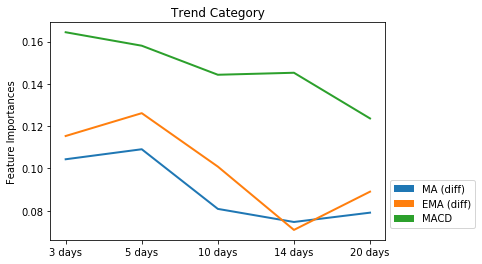

In [36]:
fig, ax = plt.subplots()

Delta_MA =np.array([GBDT_3[0], GBDT_5[0], GBDT_10[0], GBDT_14[0], GBDT_20[0]])
Delta_EMA = np.array([GBDT_3[1], GBDT_5[1], GBDT_10[1], GBDT_14[1], GBDT_20[1]])
MACD = np.array([GBDT_3[2], GBDT_5[2], GBDT_10[2], GBDT_14[2], GBDT_20[2]])

l1 = ax.plot(IDX, Delta_MA, linewidth = 2)
l2 = ax.plot(IDX, Delta_EMA, linewidth = 2)
l3 = ax.plot(IDX, MACD, linewidth = 2)

plt.ylabel('Feature Importances')
plt.title('Trend Category')
plt.xticks(IDX, ('3 days', '5 days', '10 days', '14 days', '20 days'))

plt.legend((p1[0], p2[0], p3[0]), ('MA (diff)', 'EMA (diff)', 'MACD'), bbox_to_anchor=(1, 0.3))

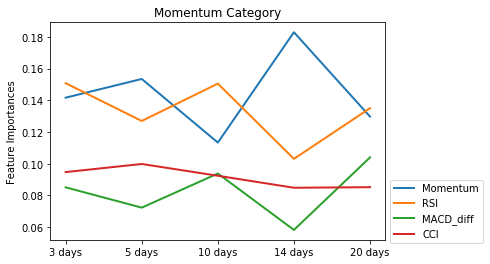

In [37]:
fig, ax = plt.subplots()

MOM = np.array([GBDT_3[3], GBDT_5[3], GBDT_10[3], GBDT_14[3], GBDT_20[3]])
RSI = np.array([GBDT_3[4], GBDT_5[4], GBDT_10[4], GBDT_14[4], GBDT_20[4]])
MACD_D = np.array([GBDT_3[5], GBDT_5[5], GBDT_10[5], GBDT_14[5], GBDT_20[5]])
CCI = np.array([GBDT_3[6], GBDT_5[6], GBDT_10[6], GBDT_14[6], GBDT_20[6]])

l1 = ax.plot(IDX, MOM, linewidth = 2)
l2 = ax.plot(IDX, RSI, linewidth = 2)
l3 = ax.plot(IDX, MACD_D, linewidth = 2)
l4 = ax.plot(IDX, CCI, linewidth = 2)

plt.ylabel('Feature Importances')
plt.title('Momentum Category')
plt.xticks(IDX, ('3 days', '5 days', '10 days', '14 days', '20 days'))

plt.legend((l1[0], l2[0], l3[0], l4[0]), ('Momentum', 'RSI', 'MACD_diff', 'CCI'), bbox_to_anchor=(1, 0.3))